In [1]:
#import the libraries you need

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.use('Agg') #this prevents it from displaying inline
import seaborn as sns
import os

In [2]:
#copy the output csv files from CellProfiler to this folder

#next let's get a list of the files in our current directory
os.listdir(os.getcwd())

['__pycache__',
 'GenerateIDs&Coords.ipynb',
 'README.md',
 'TB_Linescan_4channel.ijm',
 'LinescantoAnalysis.ipynb',
 'ID_NUC.cpproj',
 'HCMVplaques.cpproj',
 'CNN_predictionsONLY.ipynb',
 'CNNtoImageAnalysis.ipynb',
 '3biorepsLinescantoAnalysis.ipynb',
 'HCMVplaques_CK666.cpproj',
 'AcMT_Quant.cpproj',
 'dev_GenerateIDsCoordsIMGexport.ipynb',
 'TrainngValidationSetSorter.ipynb',
 'functions_dev.ipynb',
 'NuclearRotation_plot.ipynb',
 'MOCK_Linescan_3channel.ijm',
 'RC_Quant.cpproj',
 'HCMVcellclassification.py',
 '.git',
 'TB_Linescan_3channel.ijm',
 'CNN_train&predict.ipynb',
 'MOCK_Linescan_4channel.ijm',
 '.gitignore',
 'CNNexport_2channel.ijm',
 '117_20190601_H3K9me3quant_repG_v1_CNNexport',
 '_CSVfromCellProfiler',
 '.ipynb_checkpoints']

In [3]:
#get the common name from the csv files listed above 
name_var = "117_20190707_H3K9me3quant_repL_v1"

#this will then automatically generate names for the other csv files so we can load them all. Make sure these files are named correctly according to object IDs in CellProfiler
NUCcsv =  f"{name_var}_NUC_DAPI.csv"
CYTOcsv = f"{name_var}_cytoplasm.csv"
IMAGEcsv = f"{name_var}_Image.csv"
print(os.getcwd())
print(NUCcsv)
print(CYTOcsv)
print(IMAGEcsv)

/home/djproc/Github/HCMV_cellclassificationCNN
117_20190707_H3K9me3quant_repL_v1_NUC_DAPI.csv
117_20190707_H3K9me3quant_repL_v1_cytoplasm.csv
117_20190707_H3K9me3quant_repL_v1_Image.csv


In [ ]:
#we need to generate a folder to export our single extracted images to for further use by the CNN
CNNexportfolder = f"{name_var}_CNNexport"
os.mkdir(CNNexportfolder)

In [2]:
#then we need to add a symbolic link to this CNNexport folder from the the CNN model we are making predictions from (actually linking to the folder above the models folder, i usually call this "_training")
#if you aren't making any predictions, you can skip this step

#NOTE: you will need to be runnig jupyter lab in administrator mode for the symlink function to work, so open cmd.exe in admin mode (right click) then type "activate [ENV NAME e.g. fastai_new]". Then type "jupyter lab".

#enter a path to the fodler containing the trained model
MODELS_PATH = r"G:/117/117_20190601_H3K9me3quant_repE/_pipeline/v1/_training_v2" #this is the path of your general models folder, alwasys put that r in frot of the path string! 

MODELS_PATH_CNNexportfolder = os.path.join(MODELS_PATH, CNNexportfolder)
print(MODELS_PATH_CNNexportfolder)
#then get the current directory
CURRENT_PATH = os.getcwd()
print(CURRENT_PATH)
CNNexportfolder_PATH = os.path.join(CURRENT_PATH, CNNexportfolder)
print(CNNexportfolder_PATH)
os.symlink(CNNexportfolder_PATH, MODELS_PATH_CNNexportfolder)

117_20190707_H3K9me3quant_repL_v1_NUC_DAPI.csv
G:/117/117_20190601_H3K9me3quant_repE/_pipeline/v1/_training_v2\117_20190707_H3K9me3quant_repL_v1_CNNexport
G:\117\117_20190707_H3K9me3quant_repKrepL\_pipeline\v1
G:\117\117_20190707_H3K9me3quant_repKrepL\_pipeline\v1\117_20190707_H3K9me3quant_repL_v1_CNNexport


In [95]:
#now we will import our csv files into pandas dataframes

#import the data for the nucleus
df1 = pd.read_csv(NUCcsv, na_filter=True)
df1.set_index("ImageNumber", inplace=True)

#import data fro the cytoplasm
df2 = pd.read_csv(CYTOcsv, na_filter=True)
df2.set_index("ImageNumber", inplace=True)

#import data for general image info (i.e. so we can access data such as image URLs)
ImageInfo_df = pd.read_csv(IMAGEcsv)
ImageInfo_df.set_index("ImageNumber", inplace=True)

#then we are going to filter away everything but the image URLs (note, these are local URLS to the file system on your machine, your data doesn't need to be on the internet, but would work if it is)
ImageURL_df = ImageInfo_df.filter(regex=r'^URL_', axis=1) #this will select any columns starting with "URL_"
#ImageURL_df = ImageInfo_df[["URL_AcMT","URL_DAPI","URL_SUN1","URL_gB"]] #alternatively you could select the URL column names manually this way

In [97]:
#now we will merge our nucleus data with our URL data
df1 = df1.merge(ImageURL_df, left_on='ImageNumber', right_on='ImageNumber', how='outer')

#then we will merge this with our cytoplasm data and differentiate columns from the two datasets as "_NUC" and "_CYTO"
df1 = df1.merge(df2, left_on=["ImageNumber", "ObjectNumber"], right_on=["ImageNumber", "Parent_NUC_DAPI"], how="outer", suffixes=('_NUC', '_CYTO'))

In [98]:
#check that this merging worked
df1.columns.values

array(['ObjectNumber_NUC', 'Metadata_FileLocation_NUC',
       'Metadata_Frame_NUC', 'Metadata_Series_NUC', 'Metadata_biorep_NUC',
       'Metadata_biorep.1_NUC', 'Metadata_channel_NUC',
       'Metadata_date_NUC', 'Metadata_experiment_NUC',
       'Metadata_expname_NUC', 'Metadata_exprep_NUC',
       'Metadata_imageNo_NUC', 'Metadata_timepoint_NUC',
       'Metadata_timepoint.1_NUC', 'AreaShape_Area', 'AreaShape_Center_X',
       'AreaShape_Center_Y', 'AreaShape_Center_Z',
       'AreaShape_Compactness', 'AreaShape_Eccentricity',
       'AreaShape_EulerNumber', 'AreaShape_Extent',
       'AreaShape_FormFactor', 'AreaShape_MajorAxisLength',
       'AreaShape_MaxFeretDiameter', 'AreaShape_MaximumRadius',
       'AreaShape_MeanRadius', 'AreaShape_MedianRadius',
       'AreaShape_MinFeretDiameter', 'AreaShape_MinorAxisLength',
       'AreaShape_Orientation', 'AreaShape_Perimeter',
       'AreaShape_Solidity', 'Children_Cytoplasm_Count',
       'Intensity_IntegratedIntensityEdge_H3K9me3_sm

In [99]:
#sometimes you will have named things incorrectly or forgot to export metadata from cellprofiler to differentiate your datasets. Now is a great time to add that back in
#df1.loc[df1['URL_DAPI'].str.contains('96hpi'), 'Metadata_timepoint_NUC'] = '96hpi'
#df1.loc[df1['URL_DAPI'].str.contains('MOCK'), 'Metadata_timepoint_NUC'] = 'MOCK'

In [100]:
#use the pandas groupby fundtion on the df1 dataframe to count how many individual cells are in your dataset sorted by timepoint and biological replicate
df1.groupby(["Metadata_timepoint_NUC", "Metadata_biorep_NUC"]).count()

,,ObjectNumber_NUC,Metadata_FileLocation_NUC,Metadata_Frame_NUC,Metadata_Series_NUC,Metadata_biorep.1_NUC,Metadata_channel_NUC,Metadata_date_NUC,Metadata_experiment_NUC,Metadata_expname_NUC,Metadata_exprep_NUC,...,Location_CenterMassIntensity_Y_gB_small,Location_CenterMassIntensity_Z_gB_small,Location_Center_X_CYTO,Location_Center_Y_CYTO,Location_MaxIntensity_X_gB_small,Location_MaxIntensity_Y_gB_small,Location_MaxIntensity_Z_gB_small,Number_Object_Number_CYTO,Parent_NUC_DAPI,Parent_NUC_expanded
Metadata_timepoint_NUC,Metadata_biorep_NUC,,,,,,,,,,,,,,,,,,,,,
96hpi,repL,11482,0,11482,11482,11482,0,11482,11482,11482,11482,...,11482,11482,11482,11482,11482,11482,11482,11482,11482,11482
MOCK,repL,7208,0,7208,7208,7208,0,7208,7208,7208,7208,...,7208,7208,7208,7208,7208,7208,7208,7208,7208,7208


In [101]:
#we can also just look at the raw number of rows in the dataframe to see how many nuclei we've identified
rows_in_df = df1.shape[0]
print(f'Number of nuclei detected: {rows_in_df:,.0f}')

Number of nuclei detected: 18,694


In [7]:
#df1.columns.values

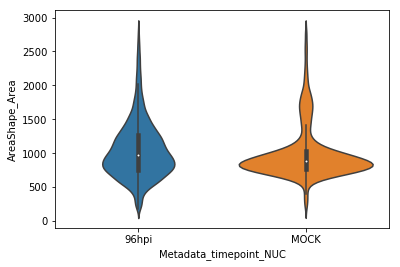

In [103]:
#we can then plot the area of the nucleus for each timepoint
display_col = "AreaShape_Area"
sns.violinplot(x="Metadata_timepoint_NUC", y=display_col, data=df1.reset_index(), size=1);    
plt.show()

(0, 0.1)

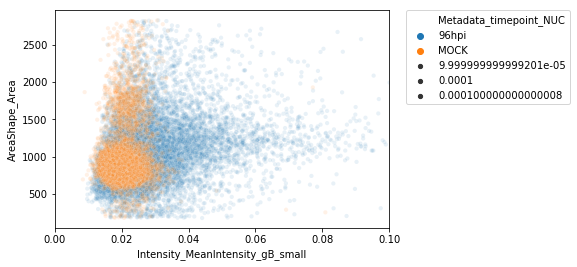

In [104]:
#then we can plot gB intensity vs area to see that there are larger infected nuclei that have gB staining in the surrounding cytoplasm
sns.scatterplot(x='Intensity_MeanIntensity_gB_small', y='AreaShape_Area', data=df1.reset_index(), hue='Metadata_timepoint_NUC', size=0.0001, alpha=0.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(0,0.1)
#plt.ylim(0.02,0.08)

# Generate unique IDs

In [106]:
#now that our dataset looks good, we can generate unique IDs for each of the nuclei in our dataset
df_merge_OUTPUT = df1
df_merge_OUTPUT.reset_index(inplace=True)
df_merge_OUTPUT.rename(columns={'ObjectNumber_NUC':'NUC_ID'}, inplace=True)
df_merge_OUTPUT.head()

In [111]:
#CellProfiler can create empty NaN rows, so we can just filter them out using dropna
df_merge_OUTPUT.dropna(subset=['NUC_ID'], inplace=True)
df_merge_OUTPUT.head()

In [113]:
df_merge_OUTPUT.columns.values

array(['ImageNumber', 'NUC_ID', 'Metadata_FileLocation_NUC',
       'Metadata_Frame_NUC', 'Metadata_Series_NUC', 'Metadata_biorep_NUC',
       'Metadata_biorep.1_NUC', 'Metadata_channel_NUC',
       'Metadata_date_NUC', 'Metadata_experiment_NUC',
       'Metadata_expname_NUC', 'Metadata_exprep_NUC',
       'Metadata_imageNo_NUC', 'Metadata_timepoint_NUC',
       'Metadata_timepoint.1_NUC', 'AreaShape_Area', 'AreaShape_Center_X',
       'AreaShape_Center_Y', 'AreaShape_Center_Z',
       'AreaShape_Compactness', 'AreaShape_Eccentricity',
       'AreaShape_EulerNumber', 'AreaShape_Extent',
       'AreaShape_FormFactor', 'AreaShape_MajorAxisLength',
       'AreaShape_MaxFeretDiameter', 'AreaShape_MaximumRadius',
       'AreaShape_MeanRadius', 'AreaShape_MedianRadius',
       'AreaShape_MinFeretDiameter', 'AreaShape_MinorAxisLength',
       'AreaShape_Orientation', 'AreaShape_Perimeter',
       'AreaShape_Solidity', 'Children_Cytoplasm_Count',
       'Intensity_IntegratedIntensityEdge_H3K9m

In [116]:
#again if you have forgotten to add some data, you can add that now e.g. experiment id or biorep
#df_merge_OUTPUT['Metadata_exp_NUC'] = "117"
#df_merge_OUTPUT['Metadata_biorep_NUC'] = "repB"

In [117]:
#conversion to string for concatenation
### CODE CAN BE IMPROVED ###
df_merge_OUTPUT["NUC_ID"] = df_merge_OUTPUT["NUC_ID"].astype(float).astype(int).astype(str)
df_merge_OUTPUT["ImageNumber"] = df_merge_OUTPUT["ImageNumber"].astype(float).astype(int).astype(str)
df_merge_OUTPUT['Metadata_date_NUC'] = df_merge_OUTPUT['Metadata_date_NUC'].astype(float).astype(int).astype(str)
df_merge_OUTPUT['Metadata_timepoint_NUC'] = df_merge_OUTPUT['Metadata_timepoint_NUC'].astype(str)

In [118]:
#df_merge_OUTPUT.set_index(["Metadata_timepoint", "Metadata_biorep"],inplace=True)
df_merge_OUTPUT["Unique_ID"] = df_merge_OUTPUT['Metadata_exp_NUC'].str.cat(df_merge_OUTPUT[['Metadata_date_NUC', 'Metadata_biorep_NUC','Metadata_timepoint_NUC','ImageNumber','NUC_ID']], sep="_") 
df_merge_OUTPUT["Unique_ID"].head()

0    117_20190707_repL_96hpi_1_1
1    117_20190707_repL_96hpi_1_2
2    117_20190707_repL_96hpi_1_3
3    117_20190707_repL_96hpi_1_4
4    117_20190707_repL_96hpi_1_5
Name: Unique_ID, dtype: object

## export thhese nuclei to imagej macro

In [119]:
#now we can perform some calculations to get the right coordinates of each nuclei on our full sized image dataset:

# multiply by 8 to compensate for downsizing in cellprofiler
df_merge_OUTPUT['NUC_x0'] = df_merge_OUTPUT[('Location_Center_X_NUC')]*8 #correcting for downscaling
df_merge_OUTPUT['NUC_y0'] = df_merge_OUTPUT[('Location_Center_Y_NUC')]*8 #correcting for downscaling
df_merge_OUTPUT['CYTO_x0'] = df_merge_OUTPUT[('Location_CenterMassIntensity_X_gB_small')]*8 #correcting for downscaling
df_merge_OUTPUT['CYTO_y0'] = df_merge_OUTPUT[('Location_CenterMassIntensity_Y_gB_small')]*8 #correcting for downscaling

In [8]:
#to make things easier downstream, we will rename our individual channels as C1, C2, C3, or C4

#get the names of the current channels:
ImageURL_df.columns.values

NameError: name 'ImageURL_df' is not defined

In [121]:
#rename the URL columns because subsetting with multi-index is HARD
df_merge_OUTPUT['URL_C1'] = df_merge_OUTPUT[('URL_gB')] #this will be red in imageJ
df_merge_OUTPUT['URL_C2'] = df_merge_OUTPUT[('URL_DAPI')] #this will be green in imageJ
df_merge_OUTPUT['URL_C3'] = df_merge_OUTPUT[('URL_H3K9me3')] #this will be blue in imageJ
#df_merge_OUTPUT['URL_C4'] = df_merge_OUTPUT[('URL_AcMT')] #this will be white in imageJ

In [122]:
#export this for all nuclei
df_merge_EXPORT= df_merge_OUTPUT[["Unique_ID", 'NUC_x0','NUC_y0','URL_C1','URL_C2','URL_C3','AreaShape_Orientation','CYTO_x0','CYTO_y0']] #MAKE THESE URLS for C1, C2, C3 and C4. You have a method for finding these names

In [124]:
df_merge_EXPORT.to_csv(f'{name_var}_IDsandCoords.csv', index=False)
#used the below macro to export all the single channels

In [123]:
#sometimes you will need to test things using smaller datasets, you can export a random subset of you dataset instead using the following code:
#num = 1000
#df_merge_EXPORT_rand = df_merge_EXPORT.sample(n=num)
#df_merge_EXPORT_rand.to_csv(f'{name_var}_IDsandCoords_rand_{num}.csv', index=False)

SAVED IN MACRO FOLDER OF THIS DIR. PASTE BELOW 

// to not display the pictures as they are goining, use this
setBatchMode(true);

// ask for a file to be imported
	
	fileName = File.openDialog("Select the file to import");
	allText = File.openAsString(fileName);
	tmp = split(fileName,".");
	// get file format {txt, csv}
	posix = tmp[lengthOf(tmp)-1];
	// parse text by lines
	text = split(allText, "\n");

//define your path, this is where files will be saved
	
	//path =  "B:\114\114_20180920_time course redux slide scan\_CP\v3_wholeslide_TB72only\_imgexport"
	dir = getDirectory("Select a location to save the files"); 
	
//clear results in case there is something you don't want in your output Results file

	run("Clear Results")


// define array for points and image URLS
	
	var x1points = newArray;
	var y1points = newArray;
	var x2points = newArray;
	var y2points = newArray;
	
	var nuc_Ori = newArray;
	var Xmidpoints= newArray;	
	var Ymidpoints = newArray;			
	
	var C1url = newArray;
	var C2url = newArray;
	//var C3url = newArray;
	//var C4url = newArray;
	
	var ImageID = newArray; 

//label you columns by number here (starting at 0, not 1)
	
	hdr = split(text[0]);

	iImageObjectID = 0;
	
	iXmid = 1;
	iYmid = 2;

	iC1url = 3;
	iC2url = 4;
	//iC3url = 5;
	//iC4url = 5;
				
// loading and parsing each line
	for (i = 2; i < (text.length); i++)
	{
	   //we split each line in the csv at commas 
	   line = split(text[i],",");
	   setOption("ExpandableArrays", true);   

	   //this loads the data from the csv into the arrays me setup before so that we can iterate over each line (i)
	   //these are specifically for the HCMV ac and nucleus, but you can change them if you need.

	   Xmidpoints[i-1] = parseInt(line[iXmid]);
	   Ymidpoints[i-1] = parseInt(line[iYmid]);
	   
	   C1url[i-1] = line[iC1url]; //note we do not use parseInt here because we want the URL as a string
	   C2url[i-1] = line[iC2url];
	   //C3url[i-1] = line[iC3url];
	   //C4url[i-1] = line[iC4url];
	   
	   ImageID[i-1] = line[iImageObjectID]; 

	   //now that the data is loaded from the csv, we can perform our operations
	   //open each image using the URL, draw a line with 150 width, perform a linescan and save the data to a column in the results tab 


	   open(C1url[i-1]);
	   rename("C1");
	   
	   open(C2url[i-1]);
	   rename("C2");
	   
	   //open(C3url[i-1]);
	   //rename("C3");
	   
	   run("Merge Channels...", "c1=C1 c2=C2 create");
	   run("Canvas Size...", "width=3248 height=3248 position=Center zero"); //expand canvas to 2048 + 600*2 for ROI on each side
	   makeRectangle(Xmidpoints[i-1]+300,Ymidpoints[i-1]+300,600,600); //note here we compensated for canvas size expansion
	   run("Duplicate...", "duplicate");	   			   
	   saveAs("Jpeg", dir + ImageID[i-1]+"_RGB.jpg");
	   close("*");
	   
	   //open(C4url[i-1]);
	   //run("Canvas Size...", "width=3548 height=3548 position=Center zero"); //expand canvas to 2048 + 750*2 for ROI on each side
	   //makeRectangle(Xmidpoints[i-1]+375,Ymidpoints[i-1]+375,750,750); //note here we compensated for canvas size expansion
	   //run("Duplicate...", "duplicate");	   			   
	   //rename("C4");
	   //save(dir+ImageID[i-1]+"_C4");
	   //close("*");
	   	   
	   
	   //merge all of these channles, cut out a 750x750 region and rotate to align every image on the axis of the linescan
	   //run("Merge Channels...", "c1=C1 c2=C2 c3=C3 c4=C4 create");
	   //makeRectangle(Xmidpoints[i-1]-375,Ymidpoints[i-1]-375,750,750);
	   //Roi.setStrokeWidth(2);
	   //setForegroundColor(255, 255, 255);
	   //run("Draw");
	   
	   
	   //run("Canvas Size...", "width=350 height=350 position=Center zero"); //expand canvas to 2048 + 750*2 for ROI on each side
	   //makeRectangle(Xmidpoints[i-1],Ymidpoints[i-1],50,50); //note here we compensated for canvas size expansion
	   //run("Duplicate...", "duplicate");
	   //save(dir+ImageID[i-1]);
	   //close("*");	
	
	}